In [6]:
# this is a continuation from my get_unique_student.ipynb notebook.
# please check it out to understand how I got here
# Basically, the quiz was to find the total number of rows, and number
# of unique students in three tables 

## Load Data from CSV

In [7]:
import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

## Fixing Data Types


In [8]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0] 

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [9]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [10]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

## Investigating the Data

In [11]:
# function to read .csv files
import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

In [12]:
# print number of rows

len(enrollments)

1640

In [13]:
len(daily_engagement)

136240

In [14]:
len(project_submissions)

3642

In [15]:
# solve the key mismatch problem

for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del[engagement_record['acct']]

In [16]:
# check to make sure renamed column worked

daily_engagement[0]['account_key']

u'0'

In [17]:
# create function to get unique students

def get_unique_students(data):
    unique_students = set()
    for data_record in data:
        unique_students.add(data_record['account_key'])
    return unique_students

In [18]:
# number of unique students in enrollment table

unique_enrolled_students = get_unique_students(enrollments)
len(unique_enrolled_students)

1302

In [19]:
# number of unique students in daily_engagement table

unique_engagement_students = get_unique_students(daily_engagement)
len(unique_engagement_students)

1237

In [20]:
# number of unique students in daily_engagement table

unique_submissions_students = get_unique_students(project_submissions)
len(unique_submissions_students )

743

## Problems in the Data

In [21]:
# So looking at the results, there seem to be problems in the data.
# There are more unique students in the enrollment table than in the
# daily_engagement table. Why is that??
# Think about it for a moment - the daily_engagement table is suppose to 
# include the data for each day each student is enroll even if the student 
# didn't do nothing like take a class or submit a project etc. 
# So there should have been the same number of unique students in both 
# tables.

In [22]:
# Investigating the Problem
# Always remember when you see something strange you have to investigate
# because it's tempting to just move on. Curiosity is what makes you a 
# good data analyst

# Why are students missing from the daily_engagement table?

To investigate the problem
1. Identify surprising data points
    - Any enrollment record with no corresponding engagement data
2. Print out one or a few of the surprising data points
3. Fix any problems you find
    - More investigation may be neccessary
    - or there might not be any problems!
Repeat the process and then draw conclusions

In [23]:
# let's print one missing engagement record using the break statement

for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        print enrollment
        break

{u'status': u'canceled', u'is_udacity': u'False', u'is_canceled': u'True', u'join_date': u'2014-11-12', u'account_key': u'1219', u'cancel_date': u'2014-11-12', u'days_to_cancel': u'0'}


In this case I'm using the Python break statement to print out just one record, there are many records though. But looking at the records, the could be many reasons why the student wasn't found in the daily_enagegement table.
     - maybe their status has to be current to be in the engagement table 
     - looking at the data above, days_to_cancel is 0, that could be a good reason for data not to be in the engagement table since the student joined and cancel the same day.
     
 
 Let's keep investigating for any more problems.

In [24]:
# checking for more problems

num_problem_students = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if (student not in unique_engagement_students and
       enrollment['join_date'] != enrollment['cancel_date']):
        print enrollment
        num_problem_students +=1
        
num_problem_students
    

{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2015-01-10', u'account_key': u'1304', u'cancel_date': u'2015-03-10', u'days_to_cancel': u'59'}
{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2015-03-10', u'account_key': u'1304', u'cancel_date': u'2015-06-17', u'days_to_cancel': u'99'}
{u'status': u'current', u'is_udacity': u'True', u'is_canceled': u'False', u'join_date': u'2015-02-25', u'account_key': u'1101', u'cancel_date': u'', u'days_to_cancel': u''}


3

## Missing Record/Checking for More Problems

In [25]:
# From the results above, the seem to be three more problematic enrollments.
# However, it's difficult to tell what the problem was just by looking at 
# the data. This might be a good time to ask a Data Scientist who might 
# know more about the data. In this case, these accounts were test accounts.


In [26]:
# how many test accounts found in our data
test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity'] == 'True':
        test_accounts.add(enrollment['account_key'])
len(test_accounts)

6

In [27]:
# removing those test accounts

def remove_udacity_accounts(data):
    non_udacity_account = []
    for data_point in data:
        if data_point['account_key'] not in test_accounts:
            non_udacity_account.append(data_point)
    return non_udacity_account

In [28]:
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagements = remove_udacity_accounts(daily_engagement )
non_udacity_submissions = remove_udacity_accounts(project_submissions)


print len(non_udacity_enrollments)
print len(non_udacity_engagements)
print len(non_udacity_submissions)

1622
135656
3634


# Explore Phase

       Exploring the Data

In this lesson, we'll explore the data, finding patterns in it, and building our intuition about it.

So far, we have seen how to find unique enrolled students, and fixing problems in our data.

This time, we'll try to find how many students are paying students.
To do this,
    We have to only look at student engagement after the first week i.e exclude students who canceled within a week (trial period).

In [29]:
# find paid student

paid_students = {}
for enrollment in non_udacity_enrollments:
    if (not enrollment['is_canceled'] or \
            enrollment['days_to_cancel'] > 7):
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        
        if (account_key not in paid_students or
           enrollment_date > paid_students[account_key]):
            paid_students[account_key] = enrollment_date
        
        
            
len(paid_students)



1296

## Getting Data from First Week

In [30]:
# Take a student's join date and the date of a specific engagement record,
# and return True if that engagement record happened within one week of
# the student joining

def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [31]:
# remove free trial student record

def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

In [32]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagements)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)

1622
135656
3626


In [33]:
# create a has_visited column for number of visited courses 

for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0


In [34]:
# find paid student within one week of join date

paid_engagement_in_first_week = []

for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = parse_date(paid_students[account_key])
    engagement_record_date = parse_date(engagement_record['utc_date'])

    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)

len(paid_engagement_in_first_week)

7932

## Exploring Student Engagement


In [35]:
from collections import defaultdict

# We'll create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
# We'll use the defaultdict subclass of dict to group into a dictionary of
# list
engagement_by_account = defaultdict(list)

for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [36]:
# Create a dictionary with the total minutes each student spent in the 
# classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)

total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += float(engagement_record['total_minutes_visited'])
    total_minutes_by_account[account_key] = total_minutes

In [37]:
# Summarize the data about minutes spent in the classroom

import numpy as np

total_minutes = total_minutes_by_account.values()

print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 261.836637932
Standard deviation: 388.625347977
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

Just like before 

1. Identify surprising data points
2. Print out one or a few surprising points
3. Fix any problems you find

In [38]:
# find student with max number of minutes

student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student

max_minutes

3564.7332644989997

In [39]:
# print each engagement record for that student

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print engagement_record

{u'lessons_completed': u'4.0', u'num_courses_visited': u'4.0', 'has_visited': 1, u'total_minutes_visited': u'850.519339666', u'projects_completed': u'0.0', 'account_key': u'163', u'utc_date': u'2015-07-09'}
{u'lessons_completed': u'6.0', u'num_courses_visited': u'6.0', 'has_visited': 1, u'total_minutes_visited': u'872.633923334', u'projects_completed': u'0.0', 'account_key': u'163', u'utc_date': u'2015-07-10'}
{u'lessons_completed': u'6.0', u'num_courses_visited': u'2.0', 'has_visited': 1, u'total_minutes_visited': u'777.018903666', u'projects_completed': u'0.0', 'account_key': u'163', u'utc_date': u'2015-07-11'}
{u'lessons_completed': u'2.0', u'num_courses_visited': u'1.0', 'has_visited': 1, u'total_minutes_visited': u'294.568774', u'projects_completed': u'0.0', 'account_key': u'163', u'utc_date': u'2015-07-12'}
{u'lessons_completed': u'1.0', u'num_courses_visited': u'3.0', 'has_visited': 1, u'total_minutes_visited': u'471.2139785', u'projects_completed': u'0.0', 'account_key': u'163'

## Lessons Completed in First Week

In [40]:
# Let's Adapt the code from Exploring Student Engagement above to find the
# mean, standard deviation, minimum, and maximum for the number of lessons
# completed by each student during the first week.

from collections import defaultdict

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week,
                                   'account_key')


In [41]:
def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += float(data_point[field_name])
        summed_data[key] = total
    return summed_data

total_minutes_by_account = sum_grouped_items(engagement_by_account,
                                             'total_minutes_visited')


In [42]:
import numpy as np

def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)

describe_data(total_minutes_by_account.values())


Mean: 261.836637932
Standard deviation: 388.625347977
Minimum: 0.0
Maximum: 3564.7332645


In [43]:
# call functions to analyze lessons completed in first week

lessons_completed_by_account = sum_grouped_items(engagement_by_account,
                                                 'lessons_completed')
describe_data(lessons_completed_by_account.values())

Mean: 1.39529220779
Standard deviation: 2.81209307227
Minimum: 0.0
Maximum: 36.0


In [44]:
# Number of visits in the first week

days_visited_by_account = sum_grouped_items(engagement_by_account,
                                            'has_visited')
describe_data(days_visited_by_account.values())

Mean: 6.43831168831
Standard deviation: 1.36137335413
Minimum: 1.0
Maximum: 7.0


## Splitting out Passing Students

In [45]:
# In this lesson we'll create two lists of engagement data for paid 
# students in the first week. The first list contain data for students 
# who eventually pass the subway project, and the second list should 
# contain data for students who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']    

    if ((project in subway_project_lesson_keys) and
            (rating == 'PASSED' or rating == 'DISTINCTION')):
        pass_subway_project.add(submission['account_key'])

len(pass_subway_project)


647

In [46]:
passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print len(passing_engagement)
print len(non_passing_engagement)


4526
3406


## Comparing the Two Student Groups
 - comparing students who pass to those who don't

In [47]:
# Now let's compute some interesting metrics to see how they differ for
# students who pass the subway project vs. students who don't. A good
# starting point would be the metrics we looked at earlier (minutes spent
# in the classroom, lessons completed, and days visited).

In [48]:

passing_engagement_by_account = group_data(passing_engagement,
                                           'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement,
                                               'account_key')

In [49]:
# minutes spent

print 'non-passing students:'
non_passing_minutes = sum_grouped_items(non_passing_engagement_by_account,
                                        'total_minutes_visited')
describe_data(non_passing_minutes.values())

print ''
print 'passing students:'
passing_minutes = sum_grouped_items(passing_engagement_by_account,
                                    'total_minutes_visited')
describe_data(passing_minutes.values())


non-passing students:
Mean: 115.177226468
Standard deviation: 233.498238688
Minimum: 0.0
Maximum: 1768.52274933

passing students:
Mean: 394.442133614
Standard deviation: 448.617597806
Minimum: 0.0
Maximum: 3564.7332645


In [50]:
# lessions completed

print 'non-passing students:'
non_passing_lessons = sum_grouped_items(non_passing_engagement_by_account,
                                        'lessons_completed')
describe_data(non_passing_lessons.values())

print
print 'passing students:'
passing_lessons = sum_grouped_items(passing_engagement_by_account,
                                    'lessons_completed')
describe_data(passing_lessons.values())


non-passing students:
Mean: 0.668376068376
Standard deviation: 2.17431193843
Minimum: 0.0
Maximum: 27.0

passing students:
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0.0
Maximum: 36.0


In [51]:
# visited courses
print 'non-passing students:'
non_passing_visits = sum_grouped_items(non_passing_engagement_by_account,
                                       'has_visited')
describe_data(non_passing_visits.values())

print
print 'passing students:'
passing_visits = sum_grouped_items(passing_engagement_by_account,
                                   'has_visited')
describe_data(passing_visits.values())


non-passing students:
Mean: 5.82222222222
Standard deviation: 1.7819182553
Minimum: 1.0
Maximum: 7.0

passing students:
Mean: 6.99536321484
Standard deviation: 0.0679358917337
Minimum: 6.0
Maximum: 7.0


## Making Histograms (Data Visualization)

At this point instead of printing out more statistics, it makes sense to visualize the data using a histogram.

In Python, you can make a Histogram using the matplotlib library, which is a package that comes with Anaconda.

#### Adding lables and titles

In matplotlib, axis labels can be added using 
     - plt.xlabel("Label for x axis") and 
     - plt.ylabel("Label for y axis"). 

For histograms, usually only an x-axis label is needed, but for other plot types a y-axis label may also be needed. 

You can also add a title using 
    - plt.title("Title of plot").

#### Making plots look nicer with seaborn

Automatically, we can make matplotlib plots look nicer using the seaborn library. This library is not automatically included with Anaconda, but using Anaconda's package manager makes it easier to add new libraries. 

The package manager is called conda, and to use it, open the Command Prompt (on a PC) or terminal (on Mac or Linux), and type the command 
 - conda install seaborn.


(array([ 3.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,  1.]),
 array([ 2. ,  2.3,  2.6,  2.9,  3.2,  3.5,  3.8,  4.1,  4.4,  4.7,  5. ]),
 <a list of 10 Patch objects>)

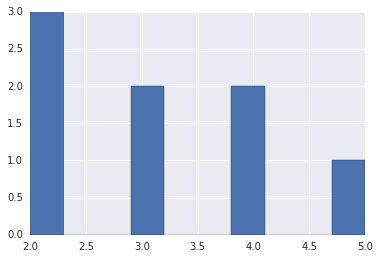

In [66]:
# Example code to make a Histogram
# Plots look nicer with seaborn installed

sample_data = [2,3,2,4,4,2,5,3]

%matplotlib inline     
import matplotlib.pyplot as plt 
import seaborn as sns

plt.hist(sample_data) 

# the line %matplotlib inline is specific to Ipython notebook and causes
# the plot to appear in the notebook rather than a new window 
# next we import matplotlib's pyplot module and call it plt
# also import seaborn library as sns 
# finally we call pyplot hist() function or method to plot our data



In [67]:
# Now let's make histograms to compare our three metrics from before 
# minutes, lessons, and visits for passing and non-passing students.

%pylab inline

import matplotlib.pyplot as plt
import numpy as np


# Summarize the given data
def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)
    #plt.hist(data)
    return


Populating the interactive namespace from numpy and matplotlib


### minutes spent

non-passing students:
Mean: 115.177226468
Standard deviation: 233.498238688
Minimum: 0.0
Maximum: 1768.52274933


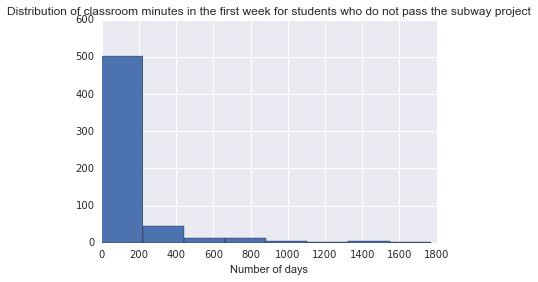

In [68]:
# minutes spent
print 'non-passing students:'
non_passing_minutes = sum_grouped_items(non_passing_engagement_by_account,
                                        'total_minutes_visited')
describe_data(non_passing_minutes.values())

plt.hist(non_passing_minutes.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom minutes in the first week ' + 
          'for students who do not pass the subway project')


passing students:
Mean: 394.442133614
Standard deviation: 448.617597806
Minimum: 0.0
Maximum: 3564.7332645


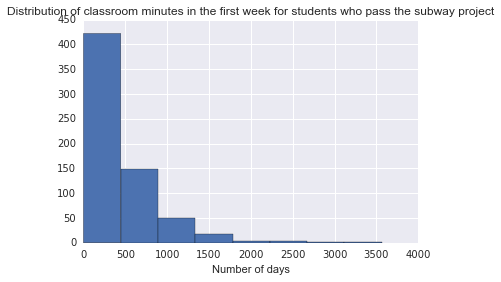

In [69]:
print 'passing students:'
passing_minutes = sum_grouped_items(passing_engagement_by_account,
                                    'total_minutes_visited')
describe_data(passing_minutes.values())

plt.hist(passing_minutes.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom minutes in the first week ' + 
          'for students who pass the subway project')

### lessions completed

non-passing students:
Mean: 0.668376068376
Standard deviation: 2.17431193843
Minimum: 0.0
Maximum: 27.0


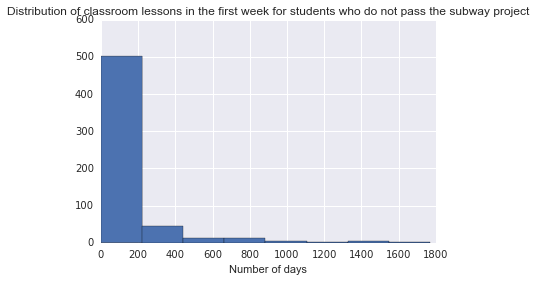

In [72]:
# lessions completed

print 'non-passing students:'
non_passing_lessons = sum_grouped_items(non_passing_engagement_by_account,
                                        'lessons_completed')
describe_data(non_passing_lessons.values())

plt.hist(non_passing_minutes.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom lessons in the first week ' + 
          'for students who do not pass the subway project')



passing students:
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0.0
Maximum: 36.0


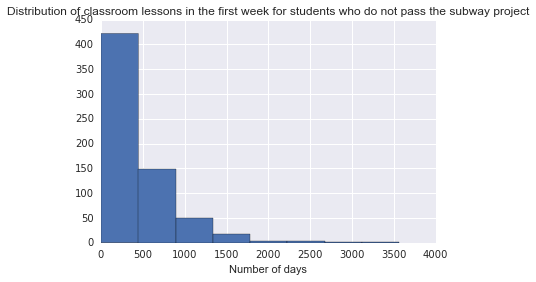

In [73]:

print 'passing students:'
passing_lessons = sum_grouped_items(passing_engagement_by_account,
                                    'lessons_completed')
describe_data(passing_lessons.values())

plt.hist(passing_minutes.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom lessons in the first week ' + 
          'for students who do not pass the subway project')




### visited courses

non-passing students:
Mean: 5.82222222222
Standard deviation: 1.7819182553
Minimum: 1.0
Maximum: 7.0


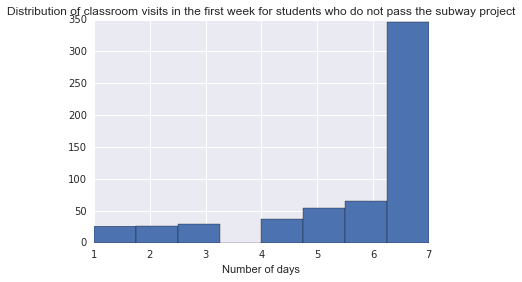

In [78]:
# visited courses
print 'non-passing students:'
non_passing_visits = sum_grouped_items(non_passing_engagement_by_account,
                                       'has_visited')
describe_data(non_passing_visits.values())

plt.hist(non_passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who do not pass the subway project')



passing students:
Mean: 6.99536321484
Standard deviation: 0.0679358917337
Minimum: 6.0
Maximum: 7.0


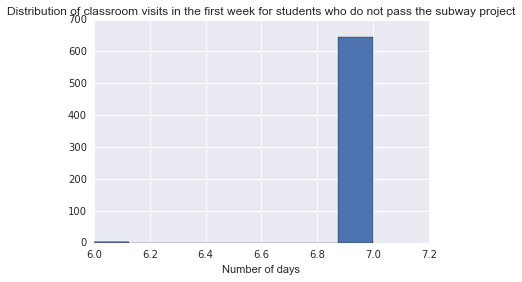

In [77]:
print 'passing students:'
passing_visits = sum_grouped_items(passing_engagement_by_account,
                                   'has_visited')
describe_data(passing_visits.values())

plt.hist(passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who do not pass the subway project')




# Drawing Conclusion Phase

- Tentative Conclusion
    - students who pass the subway project spend more minutes in the classroom during their first week
    
Is this a true difference or could it be due to noise in the data?
    - well the differences look pretty large so it'll be hard to imagine
    the results were due to noise.
    - However, we can rigorously check the differences, if the results
    were by random chance. For that we would need to use statistics.
    That's a subject for another day.

### Correlation Does Not Imply Causation
 
     Students who pass the first project are more likely to visit the 
     classroom multiple times in the first week (correlation)
     
     Does visiting the classroom multiple times cause students to pass
     the projects?

Factors that could cause visiting the classroom and passing the project
could be: 
        - level of interest
        - Background knowledge
or this correlation could be because of causation! We just don't know.

To find out whether one changes causes another, run an A/B test.

### Making Predictions

Which students are likely to pass their first project?

We could take a first pass using heuristics, but getting a really good prediction this way could be difficult.
    - lots of different pieces of information or features to look at
    - These features can interact
    
In many situations like this, using Machine learning can make predictions automatically, much better than predictions made by hand.

And depending on the Machine Learning Algorithm used, it might also give a ranked list of which features were most important to the prediction which can be very interesting.

To learn more about Machine learning, check out a free Intro to Machine Learning course on Udacity.com

# Communication Phase

This is the final phase of the data analysis process and in this phase you will communicate
    - What findings are most interesting and
    - How will you present them
    
For example, in our analysis above, our findings were 
 - Difference in total minutes
 - Difference in days visited

And we presented them by
 - Reporting average minutes and
 - Showed histograms
 
Finally, make sure to polish all visualizations so your readers can understand